<a href="https://colab.research.google.com/github/project-ccap/project-ccap.github.io/blob/master/notebooks/2021_0412Dell_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulations and explanation for the weight-decay and sp models
- date: 2021-0412
- author: Shin Asakawa
- Origin: Foygel and Dell (2000) Models of Impaired Lexical Access in Speech Production, 
- Journal of Memory and Language 43, 182–216 (2000) doi:10.1006/jmla.2000.2716

<!--
## 蘊蓄

ボックスアンドアローモデル，日本名，箱と矢印モデルの起源は，言うまでもなく，情報処理分野からの借用であろう。
情報処理モデルを取り入れた，認知心理学関係者のモデルが認知心理学的症状を説明するために用いられたことが起源であろう。
[Wikipedia の記述](https://en.wikipedia.org/wiki/Cognitive_model)でもそのように書かれている。
ところで，ボックスアンドアローモデルを，
２つに分けることができると思う。
1. フローチャート型 flowchart
2. 力学系型 dyanmical system

慣例として，いずれのモデルでも，コンピュータコードとして実装が存在すると，計算モデルと呼ばれるようである。
Marr の意味での 計算論モデル は数学的に記述可能なモデルを指す。一方，数学的な記述とは無関係に計算モデルと呼ばれることもある。

神経心理学との関連で言えば，
二重経路連接モデル (Coltheart ら,2000) はフローチャート型モデルである。
一方，相互活性化モデル(McClelland and Rumelhart, 1981) は力学系型のモデルといえる。

両者の相違を簡単に記述すると，以下のようになる:
1. フローチャート型モデル: 箱の中で記述されている内容が実行されてから，次に矢印に示されている次の箱に処理を移し，次の箱によって指示されている処理が実行されると考える
2. 力学系モデル: 箱の状態は時々刻々変化する。その変化が矢印を通じて他の箱に伝達される。矢印で指示された次の箱の処理は，前の箱の処理が終了することを仮定しないで自律的に動作する。言い換えれば，力学系モデルでは，各箱に状態が存在し，その状態が変動することを仮定する。

一方で，フローチャートモデルでは，状態に重きを置くのではなく，手順として記述される。
フローチャートで状態変化を記述することも可能であるし，力学系モデルで手順を記述することも可能である。
このため両者は，しばしば同一視して用いられることもある。
ある段階 (ステージ) が終了してから，次の段階が駆動されるような逐次段階を仮定する初期の，二重経路連接モデルと，各段階の状態が時間変動する相互活性化モデルとの相違である。

いずれのモデルが優れている，劣っているということではない。
そうではなく，両モデルの相違を念頭に置いて議論した方がモデルを評価する際に便利であろうと思う。

ニューラルネットワーク用語で言えば，フローチャート型モデルの代表は，階層型ニューラルネットワークであり，力学系モデルの代表はリカレントニューラルネットワークである。
階層型とリカレント型との両ニューラルネットワークの相違は，自己結合を持つか否かである。
次式は，それぞれのニューラルネットワークの動作式を表している:

$$
\begin{cases}
y_i &= a\left(\sum_i w_ix_i + b_i\right), \hspace{3em}\text{階層型の場合}\\
y_{i,t+1} &= a\left(y_{i,t}+\sum_i w_ix_{i,t-1} + b_i\right),\hspace{3em}\text{リカレント型}
\end{cases}
$$ 

ここで，$y$:ニューロンの出力，$a$:出力関数, $w$:シナプス結合強度, $x$:ニューロンへ入力信号 を表す。
-->

In [1]:
from IPython import display

print('Foygell and Dell (2000) Fig. 1. オリジナルは Dell (1997) 3 つの層の結合は双方向。\n上から意味層, 語彙層, 音素層。最上層の意味層で 暗く塗りつぶされているニューロンは `cat`, `dog`, `rat` で共有されていることを示す。')

display.Image(url='https://raw.githubusercontent.com/project-ccap/project-ccap.github.io/master/figures/2000Foygel_Dell_fig1.png', width=480)


Foygell and Dell (2000) Fig. 1. オリジナルは Dell (1997) 3 つの層の結合は双方向。
上から意味層, 語彙層, 音素層。最上層の意味層で 暗く塗りつぶされているニューロンは `cat`, `dog`, `rat` で共有されていることを示す。


In [2]:
print('必要となるライブラリの読み込み...', end=" ")
import numpy as np
import sys
import time

from numpy.random import Generator, PCG64
rng = Generator(PCG64())
#rng.standard_normal()

# 表示精度桁数の設定
#np.set_printoptions(suppress=False, formatter={'float': '{:7.4f}'.format})
np.set_printoptions(suppress=False, formatter={'float': '{:6.3f}'.format})

import matplotlib.pyplot as plt
%matplotlib inline

#事前に japanize_matplotlib のインストールが必要です。次行，行頭の #を削除してく，このセルを実行してください
!pip install japanize_matplotlib
import japanize_matplotlib
print('done')

rng = Generator(PCG64())  # 乱数の定義

必要となるライブラリの読み込み... Collecting japanize_matplotlib
     |████████████████████████████████| 4.1MB 5.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=25996243b55ddea8f6b5e6645dfc19fc787c5afc5ef280c8bc9dddb14e47b7b1
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib
done


#Dell モデルの再現実験, 原著論文 Foygell and Dell (2000)を参照のこと


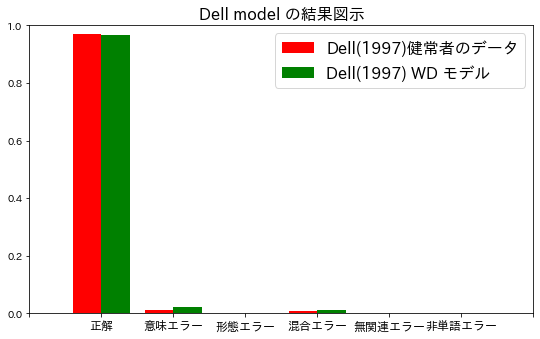

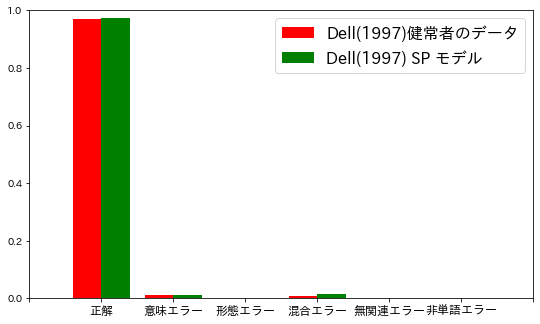

In [4]:
print('#Dell モデルの再現実験, 原著論文 Foygell and Dell (2000)を参照のこと')
FoygellDell_tab1={
    #Table 1 のデータ
    'LH':[0.69,0.03,0.07,0.15,0.01,0.02],
    'IG':[0.69,0.09,0.05,0.02,0.03,0.01]
}

FoygellDell_tab2_and_4={
    #Table 2 に記載のデータ。小数点以下４桁目が必要なのか疑問。理由は PNT の検査図版は 175 枚しかない。
    #どんなに努力しても一回の検査で得られるデータは 175 しかないのだから，小数点以下 2 桁で十分ではないかなー
    #各行のデータ， 最初の 6 列は，それぞれののデータ，
    #2行目最後の 4 列は weight, decay パラメータの推定値を表す. Foygell and Dell (2000)table 4 より引用
    #3行目は Tab.4 の sp モデル
    'W.B.': [[0.9400,0.0200,0.0100,0.0100,0.0100,0.0000,0.0200,0.5600, 0.0352, 0.0274],
             [0.9416,0.0309,0.0063,0.0137,0.0054,0.0021,0.0255,0.5781,0.0054,2.282],
             [0.9419,0.0282,0.0076,0.0172,0.0047,0.0004,0.0352,0.0274,0.0051, 2.194]],
    'T.T.': [[0.9300,0.0100,0.0100,0.0000,0.0200,0.0000,0.0200,0.5600, 0.0340, 0.0866],
             [0.9247,0.0496,0.0063,0.0055,0.0131,0.0008,0.0542,0.6758,0.0168,7.657],
            [0.9689,0.0077,0.0109,0.0000,0.0125,0.0000,0.0340,0.0866,0.0162,1.194]],
    'J.Fr.':[[0.9200,0.0100,0.0100,0.0200,0.0200,0.0000,0.0200,0.5600, 0.0316, 0.0305],
             [0.9061,0.0536,0.0111,0.0160,0.0116,0.0016,0.0470,0.6602,0.0191,7.782],
             [0.9332,0.0366,0.0074,0.0140,0.0070,0.0018,0.0316,0.0305,0.0135,8.566]],
    'V.C.':[[0.8700,0.0200,0.0100,0.0300,0.0100,0.0000,0.0200,0.5700, 0.0407, 0.0229],
            [0.9145,0.0390,0.0112,0.0265,0.0056,0.0032,0.0213,0.5703,0.0199,3.267],
            [0.9317,0.0246,0.0079,0.0305,0.0053,0.0000,0.0407,0.0229,0.0253,1.694]],
    'L.B.':[[0.8200,0.0400,0.0200,0.0900,0.0100,0.0100,0.0070,0.5000, 0.0274, 0.0221],
            [0.8248,0.0528,0.0300,0.0708,0.0066,0.0150,0.0087,0.5156,0.0107,2.641],
            [0.8213,0.0534,0.0273,0.0828,0.0075,0.0077,0.0274,0.0221,0.0070,1.306]],
    'J.B.':[[0.7600,0.0600,0.0100,0.0500,0.0200,0.0100,0.0065,0.5000, 0.0264, 0.0246],
            [0.8288,0.0798,0.0266,0.0374,0.0183,0.0091,0.0523,0.6953,0.0305,4.458],
            [0.8419,0.0564,0.0259,0.0561,0.0084,0.0113,0.0264,0.0246,0.0345,6.088]],
    'J.L.':[[0.7600,0.0300,0.0100,0.0600,0.0300,0.0100,0.0250,0.6000, 0.0255, 0.0221],
            [0.8288,0.0798,0.0266,0.0374,0.0183,0.0091,0.0523,0.6953,0.0368,11.966],
            [0.7921,0.0601,0.0375,0.0867,0.0107,0.0129,0.0255,0.0221,0.0251,14.040]],
    'G.S.': [[0.7000,0.0200,0.0600,0.1500,0.0100,0.0200,0.0057,0.5000, 0.0246, 0.0191],
             [0.6894,0.0673,0.0615,0.1404,0.0087,0.0327,0.0070,0.5156,0.0208,6.865],
             [0.7182,0.0555,0.0505,0.1511,0.0080,0.0167,0.0246,0.0191,0.0168,4.570]],
    'L.H.':[[0.6900,0.0300,0.0700,0.1500,0.0100,0.0200,0.0057,0.5000,0.0237,0.0178],
            [0.6767,0.0700,0.0671,0.1466,0.0088,0.0308,0.0065,0.5117,0.0179,4.773],
            [0.6712,0.0573,0.0661,0.1768,0.0085,0.0201,0.0237,0.0178,0.0175,3.166]],
    'J.G.':[[0.5500,0.0600,0.0800,0.1800,0.0400,0.0300,0.0450,0.7000,0.0191,0.0172],    
            [0.5543,0.1121,0.1091,0.1542,0.0246,0.0457,0.0514,0.7227,0.0281,8.988],
            [0.5667,0.0746,0.0882,0.2170,0.0123,0.0412,0.0191,0.0172,0.0217,13.273]],
    'E.G.':[[0.9300,0.0300,0.0000,0.0100,0.0200,0.0000,0.1000,0.6000,0.0316,0.0305],
            [0.9222,0.0498,0.0017,0.0062,0.0199,0.0002,0.0698,0.7148,0.0089,2.129],
            [0.9332,0.0336,0.0074,0.0140,0.0070,0.0018,0.0316,0.0305,0.0070,6.245]],
    'B.Me.':[[0.8400,0.0300,0.0100,0.0000,0.0500,0.0100,0.1000,0.8200,0.0165,0.0866],
             [0.8424,0.0925,0.0147,0.0216,0.0258,0.0030,0.0750,0.7617,0.0290,18.265],
             [0.8468,0.0313,0.0938,0.0000,0.0177,0.0104,0.0165,0.0866,0.0368,23.438]],
    'B.Mi.':[[0.8300,0.0500,0.0100,0.0100,0.0200,0.0100,0.0550,0.7000,0.0255,0.0328],
             [0.8712,0.0620,0.0202,0.0280,0.0120,0.0066,0.0407,0.6484,0.0198,4.914],
            [0.8973,0.0538,0.0181,0.0128,0.0078,0.0102,0.0255,0.0328,0.0282,5.012]],
    'J.A.':[[0.7800,0.0400,0.0000,0.0200,0.0300,0.0100,0.0580,0.7000,0.0246,0.0294],
            [0.8455,0.0824,0.0191,0.0259,0.0234,0.0037,0.0626,0.7227,0.0331,10.487],
            [0.8627,0.0637,0.0263,0.0236,0.0093,0.0144,0.0246,0.0294,0.0378,15.927]],
    'A.F.':[[0.7500,0.0200,0.0300,0.0700,0.0600,0.0400,0.1000,0.8500,0.0205,0.0229],
            [0.7318,0.1004,0.0565,0.0679,0.0258,0.0176,0.0573,0.7246,0.0391,26.456],
            [0.7113,0.0841,0.0644,0.0935,0.0123,0.0344,0.0205,0.0229,0.0401,45.699]],
    'N.C.':[[0.7500,0.0300,0.0700,0.0800,0.0100,0.0000,0.1000,0.8500,0.0237,0.0221],
            [0.7683,0.0621,0.0488,0.0929,0.0079,0.0200,0.0078,0.5156,0.0199,8.503],
            [0.7693,0.0638,0.0479,0.0907,0.0082,0.0201,0.0237,0.0221,0.0205,8.810]],
    'I.G.':[[0.6900,0.0900,0.0500,0.0200,0.0300,0.0100,0.1000,0.8600,0.0198,0.0340],
            [0.7594,0.1116,0.0475,0.0457,0.0255,0.0103,0.0661,0.7500,0.0315,4.534],
            [0.7948,0.0863,0.0544,0.0131,0.0138,0.0376,0.0198,0.0340,0.0449,10.018]],
    'H.B.':[[0.6100,0.0600,0.1300,0.1800,0.0200,0.0100,0.0500,0.7130,0.0191,0.0172],
            [0.5526,0.1002,0.1120,0.1697,0.0170,0.0485,0.0400,0.6816,0.0337,9.922],
            [0.5667,0.0746,0.0882,0.2170,0.0123,0.0412,0.0191,0.0172,0.0322,10.628]],
    'J.F.':[[0.5600,0.1400,0.0100,0.0200,0.1100,0.0100,0.1000,0.8600,0.0107,0.0365],
            [0.7129,0.1359,0.0452,0.0587,0.0391,0.0082,0.0982,0.8594,0.0721,37.590],
            [0.5237,0.1369,0.1662,0.0136,0.0178,0.1418,0.0107,0.0365,0.0928,131.684]],
    'G.L.':[[0.2800,0.0400,0.2100,0.3000,0.0300,0.0900,0.0790,0.8500,0.0093,0.0154],
            [0.2500,0.0985,0.2036,0.3121,0.0282,0.1076,0.0806,0.8594,0.0284,7.351],
            [0.2716,0.1020,0.1565,0.3230,0.0137,0.1332,0.0093,0.0154,0.0397,15.974]],
    'W.R.':[[0.0800,0.0600,0.1500,0.2800,0.0500,0.3300,0.1000,0.9400,0.0010,0.0178],
            [0.1598,0.0859,0.2027,0.4039,0.0242,0.1235,0.0965,0.9336,0.1068,82.627],
            [0.1343,0.1179,0.2319,0.2594,0.0132,0.2433,0.0010,0.0178,0.0610,37.527]]}


def draw_dell_graph(A, B, 
                    title=None,
                    width_inches=7, height_inches=4,
                    alabel='健常統制群データ(Dell,1997)', acolor='red',
                    blabel='beta 調整後のシミュレーション結果', bcolor='green',
                    fontsize=16):
    """Dell モデルのグラフ描画
    A と B 比較対象の２つのモデル出力について，６種類の反応カテゴリの
    棒グラフを描画

    引数:
    A: np.array((6))
    B: np.array((6))
    出力値:
        なし
    """
    fig = plt.figure(figsize=(width_inches,height_inches))
    ax = fig.add_axes([0,0,1,1])
    X = np.arange(B.shape[0])
    
    ax.bar(X-0.2, A, color=acolor, width=0.4, label=alabel)
    ax.bar(X+0.2, B, color=bcolor, width=0.4, label=blabel)
    plt.legend(fontsize=fontsize)
    if isinstance(title, str):
        plt.title(title,fontsize=fontsize)
    # https://www.javaer101.com/ja/article/5091810.html
    ax.set_xticks(ax.get_xticks().tolist()) 
    ax.set_ylim(bottom=0, top=1.0)
    ax.set_xticklabels(['', '正解', '意味エラー','形態エラー','混合エラー','無関連エラー', '非単語エラー', ''],fontsize=int(fontsize*0.8))

    plt.show()

#plt.title('Dell(1997) Tab. 4 より作成:')
# Dell(1997)による健常者のデータ
Dells_controls = np.array([0.9690, 0.0120, 0.0010, 0.0090, 0.0030, 0.0000])  

# Dell(1997)による WD モデルのデータ
Dells_WD = np.array([0.9660, 0.0210, 0.0000, 0.0120, 0.0000, 0.0010])  
draw_dell_graph(Dells_controls, Dells_WD, 
                title='Dell model の結果図示',
                alabel="Dell(1997)健常者のデータ", 
                blabel="Dell(1997) WD モデル")

# Foygel & Dell(2000)による SP モデルのデータ, Tab. 3 Foygel and Dell (2000)
Dells_SP = np.array([0.9722, 0.0126, 0.0011, 0.0138, 0.0002, 0.0001])  
draw_dell_graph(Dells_controls, Dells_SP, 
                alabel="Dell(1997)健常者のデータ", 
                blabel="Dell(1997) SP モデル")


In [5]:
def draw_dell_graph3(A, B, C, name='noname',
                     title = None,
                     acolor='green', bcolor='red', ccolor='blue',
                     alabel='健常統制群データ(Dell,1997)', 
                     blabel='Weight decay',
                     clabel='s-p model',
                     width_inches=4, height_inches=3,
                     fontsize=12):
    """Dell モデルのグラフ描画
    A, B, C 比較対象の 3 つのモデル出力について，６種類の反応カテゴリの棒グラフを描画

    引数:
    A: np.array((6))
    B: np.array((6))
    C: np.array((6))
    出力値:
        なし
    """
    fig = plt.figure(figsize=(width_inches,height_inches))
    ax = fig.add_axes([0,0,1,1])  #  [left, bottom, width, height] of the new axes
    A, B, C = np.array(A[:6]), np.array(B[:6]), np.array(C[:6])
    X = np.arange(B.shape[0])
    
    ax.bar(X-0.2, A, color=acolor, width=0.2, label=alabel)
    ax.bar(X    , B, color=bcolor, width=0.2, label=blabel)
    ax.bar(X+0.2, C, color=ccolor, width=0.2, label=clabel)
    plt.legend(fontsize=fontsize)
    if isinstance(title, str):
        plt.ttile(title)

    # https://www.javaer101.com/ja/article/5091810.html
    ax.set_xticks(ax.get_xticks().tolist()) 
    ax.set_ylim(bottom=0, top=1.0)
    ax.set_title('Patient {0}'.format(name))
    ax.set_xticklabels(['', '正解', '意味エラー','形態エラー','混合エラー','無関連エラー', '非単語エラー', ''],fontsize=int(fontsize*0.8))
    plt.show()



In [ ]:
np.set_printoptions(suppress=False, formatter={'float': '{:4.2f}'.format})

print('#Dell のデータ, 実データ, wd model, sp model, Foygell and Dell (2000) Table 2 and 4 を参照のこと')
for patient in FoygellDell_tab2_and_4:
    data_n = 0
    data_n_wd = 1
    data_n_sp = 2
    data = np.array(FoygellDell_tab2_and_4[patient][data_n][:6])
    wd_data = np.array(FoygellDell_tab2_and_4[patient][data_n_wd][:6])
    sp_data = np.array(FoygellDell_tab2_and_4[patient][data_n_sp][:6])
    print('{0:5s} {1} {2} {3}'.format(patient, data, wd_data, sp_data))
    draw_dell_graph3(data, wd_data, sp_data, name=patient, 
                     alabel=patient, blabel='WD モデル推定値', clabel='SP モデル推定値',
                     width_inches=6, height_inches=3, 
                     fontsize=12, 
                     ccolor='black', acolor='gray', bcolor='pink')


In [6]:
print('#ニューラルネットワーク業界で頻用される出力関数の一行野郎 one liner 定義...', end='')
sigmoid = lambda x: 1/(1+np.exp(-x)) # ロジスティックシグモイド関数
d_sigmoid = lambda x: x * (1-x)

ReLU = lambda x: np.maximum(0, x)
d_ReLU = lambda x:[1 if x_ > 0 else 0 for x_ in x]

tanh = lambda x: np.tanh(x)
d_tanh = lambda x: 1 - x**2
print('done')

print('#ソフトマックス関数の定義...', end='')
def softmax(x, beta=1.):
    """softmax 関数の定義
    引数
    x: np.array
        softmax を行う変数群，ベクトルを仮定
    beta: float
        逆温度，この値の逆数が温度
        
    戻り値
    x.shape[0] 次元の多項確率密度
    """
    if not isinstance(x, np.ndarray):
        return None

    if x.ndim == 1:
        return np.exp(x * beta)/np.exp(x * beta).sum()
    else:
        return np.array([np.exp(x_ * beta)/np.exp(x_ * beta).sum() for x_ in x])

print('done')

print('#交差エントロピー誤差関数との定義...', end='')
def CE_loss(teach, pred):
    """
    交差エントロピー誤差の計算
    - 引数
    teach: np.array
        教師信号ベクトル
    pred: np.array
        予測値ベクトル
            
    - 戻り値
    loss: float
        損失関数の値
    """
    epsilon = np.finfo(np.float).eps
    #epsilon = 0.001
    #loss = - (teach * np.log(pred) + (1-teach) * np.log(1-pred)).sum()
    loss = 0.
    for t, p in zip(teach, pred):
        if t > epsilon and p > epsilon:
            loss += t * np.log(p)
            
    return -1. * loss

print('done')


#ニューラルネットワーク業界で頻用される出力関数の一行野郎 one liner 定義...done
#ソフトマックス関数の定義...done
#交差エントロピー誤差関数との定義...done


# メモ
<!--
上の２つの結合係数行列は Dell らが用いたものである。ところがこの結合係数行列を
相関係数行列で置き換えることができるだろう。そう考えて，相関係数行列を計算してみたのが上のセルの出力中では下２つの行列である。

* **相関係数で考えておく理由**は次の通り:<br/>
Dell らは入力層のニューロン数を 54 個としている。ところが実際に動物を表現しているニューロン数は誰も数えたことが無いし，しかも，数えることが現時点では不可能である。
また，人によっても異なるであろう。
そのため 54 個というニューロン数の決定について恣意的であると言わざるを得ない。
ニューロン個数の恣意性を排除するために，各ニューロンを抽象化かつ簡便化すると，各概念について一つだけのニューロンを用意することが最小構成となる。

そのために，以下では，
1. Dell モデルのニューロン個数を用いた再現実験と，その後，
2. 相関係数行列を用いた改変モデルを示す。さらに，
3. Dell モデルでは説明の困難なパラメータ推定問題について，勾配降下法を用いて解決する方法を示す。さらに，その後，
4. 任意の単語に拡張し，日本語版も示すことにする。
-->


合成関数の微分則から，損失関数をパラメータ $\mathbf{\theta}$ の各成分 $\beta,\theta_d,\theta_s,\theta_p$ で微分することで勾配降下法による学習を定義できる。
Dell の動作方程式を若干書き換える

$$
x_{t+1} = (1-d)x_t + \theta_{s,p} \sum_i w_i x_i +\mathcal{N}(0,a_1^2+a_2^2)\hspace{1em}\text{(Dell's original)}
$$

$$
y_{i,t+1} = a\left((1-\theta_d)x_{i,t} + \theta_{s,p} \sum_j w_{j,t-1} x_{j,t}+b_i\right) \hspace{1em}\text{(modified)}
$$

ここで， $a$ は活性化関数である。$a=\mathbb{1}$ のとき Dell モデルに一致する。
$y$ は出力値， $x$ は内部状態とする。元来，Dell モデルは RNN とみなせるで，内部状態と外部出力とを区別することが妥当であると思われる。 

\begin{equation}
\begin{split}
\frac{\partial l}{\partial \theta}&=\frac{\partial l}{\partial p}\frac{\partial p}{\partial{y}}\frac{\partial y}{\partial \theta}\\
&\sum_i\frac{t_i-p_i}{p_i\left(1-p_i\right)}\sum_j p_j\left(\delta_{ij}-p_j\right)\frac{\partial y_j}{\partial\theta}\\
\end{split}
\end{equation}
ここで $\delta_{ij}$ は Dirac の delta であるとする。

$a$ が Dell の 式(1) であるとすると $\partial l/\partial\theta$ は次式のようになる:
\begin{equation}
\begin{split}
\frac{\partial l}{\partial\theta}&=\sum_i\frac{t_i-p_i}{p_i\left(1-p_i\right)}\sum_j p_i\left(\delta_{ij}-p_j\right) \frac{d}{da_j}\frac{\partial a_j}{\partial\theta}\hspace{5cm}\text{ここで， $\frac{d}{da_j}\frac{\partial a_j}{\partial\theta}=c_j$ とおくと}\\
&=\sum_i\frac{t_i-p_i}{p_i\left(1-p_i\right)}p_i\left(c_i-\sum_jp_jc_j\right)\\
&=\sum_i\frac{t_i-p_i}{1-p_i}\left(c_i-\bar{c}\right),\\
\end{split}
\end{equation}
ただし，$\mu_{x_{t-1}}$ は下位層のニューロンの出力に確率 $p_i$ を掛けて総和したもの，すなわち平均である。




以下では， 
- $t_i$: `teacher`
- $p_i$: `pred`
- $t_i-p_i$: `delta`

In [ ]:
class Dell2021():
    """Optimization for the Foygell and Dell model's parameter vector.
    ソフトマックス関数により多項分布の確率密度に変換した値から
    損失関数を算出し，その損失間数値に基づいて勾配降下法に従って各パラメータ最適化を行う
    ただし beta は逆温度である。1/beta が実際の温度
    
    $\beta$ に加えて，$\theta=(w,d,s,p)$ についても $\partial l/\partial\theta$ を用いて
    更新する
    """
    
#    def __init__(self, w=0.1, d=0.5, s=0.0698, p=0.1,
    def __init__(self, d=0.5, param=None, # w=0.1, d=0.5, s=1., p=1.,
                 beta_init=1., iter_max=10**5, lr=0.5, 
                 time_n = 16,
                 teacher=None,
                 interval=None, verbose=True, nonstop=False,
                 IFG_beta=15.,  # 頭頂葉の関与を表す
                 f=tanh, Weights='R', model='WD', data=None):
        """
        - 引数
        beta_init: float
            ソフトマックス関数を計算する際に用いる温度パラメータの初期値
        iter_max: int
            繰り返し回数の上限値。Dell のオリジナルモデルは iter_max = 16 に固定されていた
        lr: float
            学習係数
        interval: int
            途中結果を出力する際の間隔。
            デフォルトでは iter_max の 1/10 毎に途中結果を出力する
        verbose: bool
            True なら途中結果の冗長な出力を印字する
            デフォルト: True
        nonstop: bool
            途中で学習を打ち切るフラグ
            デフォルト: False
        f: function
            出力関数
        W: str
            'R': 相関係数行列を用いる
            'softmax': 相関係数をソフトマックスに変換して用いる
            else: 相関係数行列のソフトマックス変換を用いる
        """
        self.sem_jolt = 10 # 元論文 (Foygell and Dell, 2000) page 185 footnote
        self.lex_jolt = 100
        self.jolt_t = 7  # カウントが 0 ベースなので t=7 (8-1) が 8 回目
        
        if param == None:
            self.param = {'WD':{'Weight':0.1,  # for normal
                                'Decay':0.5    # for normal
                               },
                          'SP':{'Decay': 0.6,
                                'S_Weight':0.0698,
                                'P_Weight':0.1000
                               }}
        else:
            self.param = param

        if model=='WD':
            self.s, self.p = self.param['WD']['Weight'], self.param['WD']['Weight']
        else:
            self.s, self.p = self.param['SP']['S_Weight'], self.param['SP']['P_Weight']


        # 音素の定義
        self.phonemes = {'onset':['f', 'r', 'd', 'k', 'm'],
                         'vowel':['ae', 'o'],
                         'coda':['t','g']}
        self.Onset, self.Vowel, self.Coda = slice(0,5), slice(5,7), slice(7,9)

        self.teacher = teacher
        self.data = None
        self.nonstop = nonstop
        self.beta = beta_init
        self.iter_max = iter_max
        self.lr = lr
        if interval == None:
            # interval が定義されていなければ設定する
            self.interval = iter_max * 10**-1
        else:
            self.interval = interval
        if verbose == None:
            self.verbose = False
        else:
            self.verbose = True
        #self.epsilon = 10 ** -5
        self.epsilon = np.finfo(np.float).eps

        self.max_t = 16  # Dell の 1 試行あたりの繰り返し数 相互活性化モデルでの繰り返し更新回数

        self.Weights = Weights
        if self.Weights == 'R':              #相関係数
            _, self.Ws, _ = self.init_Ws()
            _, self.Wp, _ = self.init_Wp()
        elif self.Weights == 'softmax':      #ソフトマックス
            _, _, self.Ws = self.init_Ws()
            _, _, self.Wp = self.init_Wp()
        else:                                #オリジナル
            self.Ws, _, _ = self.init_Ws()
            self.Wp, _, _ = self.init_Wp()
        self.lexicon_candidates = list(self.phonology.keys())

        # nubmer of neurons of each layer
        #self.n_sem, self.n_lex, self.n_pho, self.n_phon = 6, 6, 6, 9
        self.n_sem = self.Ws.shape[1]
        self.n_lex = self.Ws.shape[0]
        if self.n_lex != self.Wp.shape[0]:  #整合性チェックのため
            assert('self.n_lex != self.Wp.shape[0]:')
        self.n_pho = self.Wp.shape[1]

        self.sem_slice = slice(0,                    self.n_sem)
        self.lex_slice = slice(self.n_sem,           self.n_sem+self.n_lex)
        self.pho_slice = slice(self.n_sem+self.n_lex,self.n_sem+self.n_lex+self.n_pho)

        self.time_n = time_n
        self.IFG_beta = IFG_beta
        self.decay = d
        #self.a1, self.a2 = 0.01, 0.16
        self.a1, self.a2 = 0., 0.
        self.f = f

        self.W = self.make_W()
        if data == None:
            self.teacher = np.array([0.97, 0.01, 0.00, 0.01, 0.00, 0.00])
            self.one_trial(verbose=verbose)
        else:
            init_neurons()
            self.data = data

        return


    def init_Ws(self):
        Ws = np.array([[1,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,0,0, 
                        0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,
                        0,0,0,0,0,0,0,0,0,0, 0,0,0,0],             # cat 正解
                       [0,0,0,0,0,0,0,1,1,1, 1,1,1,1,1,1,1,0,0,0, 
                        0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0, 
                        0,0,0,0,0,0,0,0,0,0, 0,0,0,0],             # dog 意味エラー
                       [0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,1,1,1, 
                        1,1,1,1,1,1,1,0,0,0, 0,0,0,0,0,0,0,0,0,0,
                        0,0,0,0,0,0,0,0,0,0, 0,0,0,0],             # mat 形態エラー
                       [0,0,0,0,0,0,0,1,1,1, 0,0,0,0,0,0,0,0,0,0, 
                        0,0,0,0,0,0,0,1,1,1, 1,1,1,1,0,0,0,0,0,0,
                        0,0,0,0,0,0,0,0,0,0, 0,0,0,0],             # rat 混合エラー
                       [0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0, 
                        0,0,0,0,0,0,0,0,0,0, 0,0,0,0,1,1,1,1,1,1,
                        1,1,1,1,0,0,0,0,0,0, 0,0,0,0],             # fog 無関連エラー
                       [0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0, 
                        0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,
                        0,0,0,0,1,1,1,1,1,1, 1,1,1,1]              # lat 非単語
                      ], dtype=np.float)
        Ws *= self.s
        R_ws = np.corrcoef(Ws)
        return Ws, R_ws, softmax(R_ws,beta=1)


    def init_Wp(self):
        # 語彙層と音韻層とを結ぶ結合係数行列の定義
        #                                     f.   r.   d.   k.   m.   ae.  o.   t.   g
        self.phonology = {'cat': np.array([ 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]),  # correct
                          'dog': np.array([ 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]),  # semantic error
                          'mat': np.array([ 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]),  # formal error
                          'rat': np.array([ 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]),  # mixed error
                          'fog': np.array([ 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]),  # unrelated error
                          'lat': np.array([ 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0])}  # nonword
        # phonology は BOW 形式なんですなー
        Wp = np.zeros((len(self.phonology), len(self.phonology['cat'])), dtype=np.float)
        for i, x in enumerate(self.phonology.values()):
            Wp[i] = np.copy(x)

        Wp *= self.p
        R_wp = np.corrcoef(np.array([self.phonology[item] for item in self.phonology]))
        return Wp, R_wp, softmax(R_wp, beta=1)


    def make_W(self):
        """大きな遷移行列の作成
            意味，語彙，音韻の3層を一列にならべてベクトル表現した場合
    
        戻り値:
        - W: np.array
            単一結合係数行列
        """
        if self.Weights == 'R':              #相関係数
            _, self.Ws, _ = self.init_Ws()
            _, self.Wp, _ = self.init_Wp()
        elif self.Weights == 'softmax':      #ソフトマックス
            _, _, self.Ws = self.init_Ws()
            _, _, self.Wp = self.init_Wp()
        else:                                #オリジナル
            self.Ws, _, _ = self.init_Ws()
            self.Wp, _, _ = self.init_Wp()

        nL, nS, nP = self.n_lex, self.n_sem, self.n_pho
        
        Isem, Ilex, Ipho = np.eye(nS), np.eye(nL), np.eye(nP)
        Dsem, Dlex, Dpho = np.eye(nS) * self.decay, np.eye(nL) * self.decay, np.eye(nP) * self.decay
        
        Z_sl = np.zeros((nS, nP))
        c1 = np.concatenate((Isem-Dsem, self.Ws.T, Z_sl), axis=1)
        c2 = np.concatenate((self.Ws, Ilex-Dlex, self.Wp), axis=1)
        c3 = np.concatenate((Z_sl.T, self.Wp.T, Ipho-Dpho), axis=1)
        W = np.concatenate((c1,c2,c3))
        return W

    
    def init_neurons(self):
        """各層のニューロンを初期化"""
        Sem = np.zeros([self.n_sem,], dtype=np.float)  # 意味層
        Lex = np.zeros([self.n_lex,], dtype=np.float)  # 語彙層
        Pho = np.zeros([self.n_pho,], dtype=np.float)  # 音韻層
        
        # Sem[0] すなわち cat 画像だけ 1 に設定する。すなわちネコ画像が入力されたことを意味
        #Sem[0] = 1.                   
        Sem[:10] = np.copy(np.ones(10)) * self.sem_jolt

        ret = np.concatenate((Sem,Lex,Pho))  # 一行のベクトルになるように改変
        return ret

    
    def split(self, X=None):
        if not isinstance(X, np.ndarray):
            X = np.copy(self.y)
        #s,l,p = np.copy(self.y[self.sem_slice]), np.copy(self.y[self.lex_slice]), np.copy(self.y[self.pho_slice])
        s,l,p = np.copy(X[self.sem_slice]), np.copy(X[self.lex_slice]), np.copy(X[self.pho_slice])
        
        return s, l, p

    
    def merge(self, s, l, p):
        ret = np.concatenate((s,l,p))
        return ret

    
    #def update(self, Sem, Lex, Pho, f=None):
    def update(self, f=None):
        """Dell の 3 層相互活性化モデルに従って各層のニューロンの活性値を更新
    
        引数:
        - f: function
            出力関数。指定しなければ変換せずに値を出力
            Dell らのモデルは恒等写像。そのため各ニューロンの活性値が指数関数的増加，減衰を示す。
            それを回避するためには何らかの正規化，正則化が必要になると考えられる。
            Sigmoid, tanh, ReLu, 
    
        戻り値:
        #- Sem_next: np.array
        #    次刻の意味層ベクトル
        #- Lex_next: np.array
        #    次刻の語彙層ベクトル
        #- Pho_next: np.array
        #    次刻の音韻層ベクトル
        """
        
        self.Sem, self.Lex, self.Pho = self.split(self.y)
        Sem_next = self.Sem * (1. - self.decay) + self.s * np.matmul(self.Ws.T, self.Lex)
        Lex_next = self.Lex * (1. - self.decay) + self.s * np.matmul(self.Ws, self.Sem) + self.p * np.matmul(self.Wp, self.Pho)
        Pho_next = self.Pho * (1. - self.decay) + self.p * np.matmul(self.Wp.T, self.Lex)
    
        # ノイズの付加
        for x in [Sem_next, Lex_next, Pho_next]:
            for i, xx in enumerate(x):
                xx += rng.standard_normal() * (self.a1 + self.a2 * xx)
                #x[i] = max(0, xx)  # ReLU

        # 非線形変換 or not
        if f == None:
            self.Sem, self.Lex, self.Pho = Sem_next, Lex_next, Pho_next 
        else:
            self.Sem, self.Lex, self.Pho = f(Sem_next), f(Lex_next), f(Pho_next)
            
        #return self.Sem, self.Lex, self.Pho
        return self.merge(self.Sem, self.Lex, self.Pho)


    def grad(self, Teach, X):
        # 予測値
        Prob = softmax(X, beta=self.beta)  
        
        # 教師信号と出力値との差分ベクトル
        Delta = Teach - Prob
        
        # 誤差の微分
        g_Delta = Delta / (Prob * (1-Prob)) 
        
        return Prob, Delta, g_Delta

    
    def IFG_process(self):
        """IFg: Inferior Frontal gyrus から／へ の相互作用を実現する
        """
        ##self.Sem = softmax(self.Sem, beta=beta_fixed)
        #Lex = self.y[self.n_sem:self.n_sem+self.n_lex]
        #Lex = softmax(Lex, beta=self.IFG_beta)
        
        #Pho = self.y[self.n_sem+self.n_lex:]
        #Pho = softmax(Pho, beta=self.IFG_beta)
        
        #self.y[self.n_sem:self.n_sem+self.n_lex] = np.copy(Lex)
        #self.y[self.n_sem+self.n_lex:] = np.copy(Pho)
        #self.Lex = softmax(self.Lex, beta=self.IFG_beta)
        #self.Pho = softmax(self.Pho, beta=self.IFG_beta)

        Sem, Lex, Pho = self.split()
        self.y[self.lex_slice] = np.copy(softmax(Lex))
        
        
    def one_trial(self, verbose=False):
        """Dell モデルの一試行を実施
        言い換えれば一枚のネコ画像を提示して反応を収集
        
        argments:
        max_t: int
            相互活性化モデルでの最終時刻，相互活性を繰り返す回数の上限値
            デフォルトでは 16 回。
            原著論文 (Foygell and Dell, 2000) では n と記載されている
        beta_fixed: float
            前頭葉 へ／から の相互作用の影響を制御するパラメータ
            実際にはソフトマックス関数の温度パラメータ
            
        returns:
        self.y: np.array
            
        sefl.seriesY: np.array((self.y, max_t))
            各層の履歴
        """
        time_n = self.time_n
        self.y = self.init_neurons()       #各層のニューロンの初期値の設定

        # BPTT を用いて, w, d, s, p の各パラメータを更新するため各ニューロンの履歴を保存領域の確保
        self.seriesY = np.zeros((time_n, len(self.y)), dtype=np.float)
        
        for t in range(self.max_t):
            if t == self.jolt_t:
                s,l,p = self.split()
                l[np.argmax(l)] = self.lex_jolt
                self.y[self.lex_slice] = np.copy(l)

            if verbose:
                if t == 0:
                    print('         {0}'.format(self.lexicon_candidates))
                    
                lex = self.convert_onset_vowel_coda_2_lexicon(self.y)
                pred = softmax(lex, beta=self.beta)
                loss = CE_loss(self.teacher, pred)
                print('t={0:02d} lex:{1}'.format(t+1, self.y[self.lex_slice]), end=' ')
                print('pred:{0} loss:{1:.3f} beta:{2:.3f}'.format(pred, loss, self.beta))

            self.seriesY[t] = np.copy(self.y)
            self.y = np.dot(self.W, self.y)   #各層のニューロンの値を更新 
            
        return self.y, self.seriesY


    #def convert_onset_vowel_coda_2_lexicon_invert(self, X, verbose=False):
    def convert_onset_vowel_coda_2_lexicon(self, X, verbose=False):
        """phonlogy 表現からもっともらしい語彙表現を検索し，その当てはまり度合いから
        語彙表象の値を返すことを考える。
        今一つのアイデアとしては，
        phonolgy から lexicon への逆変換を考えて，そこでの値をソフトマックスする。
        1. phonolgy 層を onset, vowel, coda の 3 部分に分解
        2. 分解した各音で softmax を実施し確率密度に変換
        3. 3 つの部分を合成して phoneme 表現とする
        4. phoneme 表現と phonology の 6 単語間の交差エントロピー誤差を計算する
        5. 6 単語との交差エントロピー誤差の値から，最小値を引き， (最大値-最小値) で割ることで 0-1 に変換
        6. マイナス 1 を掛けて 上限反転させて +1 することで， 0 から 1 までの値にする
        """
        val = np.finfo(np.float).max     #np で定義済の安全な最大値を代入
        #val = 0.
        name = 'NG'                      #len(words) + 1 語彙名のダミー
        s, lexeme, phoneme = self.split(X)
        lex = np.dot(self.Wp, phoneme)
        #lex = sigmoid(lex)
        return lex
        
        for i, word in enumerate(self.phonology):
            loss = CE_loss(phonology[word], phoneme)
            lex[i] = loss
            if loss < val:
                name = word
                val = loss
        lex_diff = lex.max() - lex.min()
        lex = - ((lex - lex.min()) / lex_diff) + 1.
        return lex

    
    
    def convert_onset_vowel_coda_2_lexicon_ok(self, X, verbose=False):
        """phonlogy 表現からもっともらしい語彙表現を検索し，その当てはまり度合いから
        語彙表象の値を返すことを考える。
        1. phonolgy 層を onset, vowel, coda の 3 部分に分解
        2. 分解した各音で softmax を実施し確率密度に変換
        3. 3 つの部分を合成して phoneme 表現とする
        4. phoneme 表現と phonology の 6 単語間の交差エントロピー誤差を計算する
        5. 6 単語との交差エントロピー誤差の値から，最小値を引き， (最大値-最小値) で割ることで 0-1 に変換
        6. マイナス 1 を掛けて 上限反転させて +1 することで， 0 から 1 までの値にする
        """
        val = np.finfo(np.float).max     #np で定義済の安全な最大値を代入
        #val = 0.
        name = 'NG'                      #len(words) + 1 語彙名のダミー
        s, lexeme, phoneme = self.split(X)
        onset, vowel, coda = softmax(phoneme[:5]), softmax(phoneme[5:7]), softmax(phoneme[7:])
        phoneme = np.concatenate((onset,vowel,coda))
        lex = np.zeros_like(lexeme)
        
        for i, word in enumerate(self.phonology):
            loss = CE_loss(phonology[word], phoneme)
            lex[i] = loss
            if loss < val:
                name = word
                val = loss
        lex_diff = lex.max() - lex.min()
        #lex = - (lex - lex.min() / lex_diff) + 1.
        lex = - ((lex - lex.min()) / lex_diff) + 1.
        return lex


    def convert_onset_vowel_coda_2_lexicon_sigmoid(self, X, verbose=False):
        """phonlogy 表現からもっともらしい語彙表現を検索し，その当てはまり度合いから
        語彙表象の値を返すことを考える。
        1. phonolgy 層を sigmoid 変換して phoneme とする
        2. phoneme 表現 と phonology の 6 単語間の交差エントロピー誤差を計算する
        5. 6 単語との交差エントロピー誤差の値から，最小値を引き， (最大値-最小値) で割ることで 0-1 に変換
        6. マイナス 1 を掛けて 上限反転させて +1 することで， 0 から 1 までの値にする
        """
        val = np.finfo(np.float).max     #np で定義済の安全な最大値を代入
        #val = 0.
        name = 'NG'                      #len(words) + 1 語彙名のダミー
        
        s, lexeme, phoneme = self.split(X)
        lex = np.zeros_like(lexeme)
        phoneme = sigmoid(phoneme)
        
        for i, word in enumerate(self.phonology):
            loss = CE_loss(phonology[word], phoneme)
            lex[i] = loss
            if loss < val:
                name = word
                val = loss
        lex_diff = lex.max() - lex.min()
        lex = - (lex - lex.min() / lex_diff) + 1.
        return lex
    

    def fit(self, teacher=None, data=None, verbose=False, nonstop=False):
        """[]
        fit は学習させることを意味するから命名

        引数:
        teacher: np.array
            教師信号。
        data: np.array
            データ。教師信号に近づくように学習させる
            
        戻り値:
        beta: float
            温度パラメータ
        [loss, pred, mse]
        loss: float
            損失関数の値
        pred: np.array
            予測値
        mse: float
            最小自乗誤差
        """
        if isinstance(teacher, np.ndarray):
            self.teacher = teacher
        elif self.teacher == None:
            print('Set the teacher signal.')
            sys.exit()

        if isinstance(data, np.ndarray):
            self.data = data
        else:
            self.y, self.seriesY = self.one_trial(verbose=verbose)
            #self.data = self.y

        lex_est = self.convert_onset_vowel_coda_2_lexicon(self.y)
        pred = softmax(lex_est)
        loss0 = CE_loss(self.teacher, pred)  #損失関数の初期値
        nonstopped = False
        
        satu_flag = False
        
        for i in range(self.iter_max):
            
            self.y, self.seriesY = self.one_trial(verbose=False)
            lex_est = self.convert_onset_vowel_coda_2_lexicon(self.y)
            pred = softmax(lex_est, beta=self.beta)
            
            loss = CE_loss(self.teacher, pred)
            if loss0 < (loss + self.epsilon) and (not satu_flag) and (i>0):
                print('iteration saturated at {0:05d} loss:{1:.3f}'.format(i,loss))
                satu_flag = True
            if loss0 > loss:
                loss0 = loss
                
            if (i % self.interval) == 0:  # 途中結果の出力
                if self.verbose:
                    delta = self.teacher - pred                #教師信号と出力値との差分ベクトル
                    mse = (delta**2).sum()/delta.shape[0]
                    print('t:{0:05d} '.format(i),end='')
                    print('beta:{0:6.3f} decay:{1:.3f} s:{2:.3f} p:{3:.3f}, loss:{4:.3f} pred:{5}'.format(
                        1/self.beta, self.decay, self.s, self.p, loss, pred))
                if (loss0 - loss) < self.epsilon and (i > 0) and (not nonstopped):
                    print('Iteration terminated at {} times'.format(i))
                    return [self.beta, self.decay, self.p, self.s], [loss, pred]
            
            self.y, self.seriesY = self.one_trial(verbose=verbose)
            lex = self.convert_onset_vowel_coda_2_lexicon(self.y)
            pred = softmax(lex, beta=self.beta)
            delta = self.teacher - pred                #教師信号と出力値との差分ベクトル
            g_delta = delta / (1-pred)

            #beta の更新
            ybar = lex.mean()
            ybar2 = np.dot(pred, lex)
            #Z = np.exp(lex).sum()
            #ydiff = lex - ybar/(Z + self.epsilon)
            ydiff = lex - ybar
            #ydiff = lex - ybar2
            self.beta += self.lr * (g_delta * ydiff).sum()

            s, l, p = self.split(self.seriesY[-1])
            W_pp = self.W[self.pho_slice, self.pho_slice]
            W_lp = self.W[self.lex_slice, self.pho_slice]
            W_sl = self.W[self.sem_slice, self.lex_slice]
            
            d_delta = np.dot(W_lp.T, g_delta)
            y = np.dot(W_pp,p)
            ybar = y.mean()
            ydiff = y - ybar
            self.decay += self.lr * (d_delta * ydiff).sum()

            l_delta = np.dot(W_lp, d_delta)
            y = np.dot(W_lp,p)
            ybar = y.mean()
            ydiff = y - ybar
            self.p += self.lr * (l_delta * ydiff).sum()
            
            s_delta = np.dot(W_sl, l_delta)
            y = np.dot(W_lp,p)
            y2 = np.dot(W_sl,y)
            ybar = y2.mean()
            ydiff = y2 - ybar
            #print('546 ydiff.sahpe:', ydiff.shape)
            #print('547 s_delta.shape:', s_delta.shape)
            #print('584 ', s_delta * ydiff)
            #sys.exit()
            self.s += self.lr * (s_delta * ydiff).sum()
                
            #self.decay -= self.lr * d_decay
            #if self.decay < self.epsilon:
            #    self.decay = self.epsilon
            #for x, y  in zip([self.s, self.p],[d_s, d_p]):
            #    x += self.lr * y


        # 平均自乗誤差の計算
        #mse = (delta**2).sum()/delta.shape[0]
        return [self.beta, self.decay, self.p, self.s], [loss, pred]
    
    
#表示桁数の設定
np.set_printoptions(suppress=False, formatter={'float': '{:4.2f}'.format})
#np.set_printoptions(suppress=False, formatter={'float': '{:4.2f}'.format})

teacher = np.copy(Dells_controls)
#teacher = np.array([0.82, 0.04, 0.02, 0.09, 0.01, 0.01])  # L.B
#f = Dell2021(Weights='raw', teacher=teacher, d=0.5, iter_max=10 ** 4, lr=25, IFG_beta=8, f=tanh, verbose=True) # f=ReLU)
model = Dell2021(Weights='raw', teacher=teacher, d=0.5, iter_max=10 ** 4, lr=1, IFG_beta=8, f=tanh, verbose=False) # f=ReLU)

#data = np.array([8.359,2.218,3.285,5.258,0.193,3.504])
#data = np.array([20.840,9.077,6.209,14.118,0.833,6.792])
[beta, decay, s, p], [loss, pred] = model.fit(teacher=teacher, verbose=False)

draw_dell_graph(teacher, pred, 
                alabel="Dell(1997)健常者のデータ", acolor='blue',
                blabel="2021 年型 Dell 最新モデル", bcolor='green')

print('          ', list(model.phonology.keys()))
print('teacher:  ', teacher)
print('pred:     ', pred)
print('beta:{0:.3f} decay:{1:.3f} s:{2:.3f} p:{3:.3f}'.format(1/beta, decay, s, p))


In [ ]:
print('#Dell のデータ, 実データ, wd model, sp model, Foygell and Dell (2000) Table 2 and 4 を参照のこと')
for patient in FoygellDell_tab2_and_4:
    data_n, data_n_wd, data_n_sp = 0, 1, 2
    data = np.array(FoygellDell_tab2_and_4[patient][data_n][:6])
    #model = Dell2021(Weights='raw', teacher=data, d=0.5, iter_max=10 ** 4, lr=1, IFG_beta=8, f=tanh, verbose=False)
    model = Dell2021(Weights='raw', teacher=data, d=0.5, iter_max=10 ** 4, lr=0.5, IFG_beta=8, f=tanh, verbose=False)
    [beta, decay, s, p], [loss, pred] = model.fit(teacher=data, verbose=False)

    #alabel=
    draw_dell_graph(data, pred, title='Foygell and Dell (2000)', 
                    alabel='patient:{0} From Foygell & Dell(2000) Tab. 2'.format(patient), acolor='black',
                    blabel='2021年型 新型Dellモデルによる推定値', bcolor='gray',
                    width_inches=6, height_inches=3, fontsize=12)


In [ ]:
#import gensim.downloader as api
#glove_en = api.load('word2vec-google-news-300', return_path=True)

#DellX = np.zeros((len(lexicons),len(glove_en['cat'])))
#for i, word in enumerate(lexicon):
#    DellX[i] = np.copy(glove_en[word])

#Dell_wordR = np.corrcoef(DellX)
#np.savetxt('Dell_wordR.txt',Dell_wordR)

# Dell の Lexicon 間の相関係数行列。存在しない場合は，このセル上部のコメントをはずして実行
Dell_LexR = np.array([
    [1.000000000000000000e+00, 7.607610875238556281e-01, 1.526896477666510876e-01, 
     5.327596034338319964e-01, 7.083070865057317089e-02, -1.112107376916258127e-02],
    [7.607610875238557391e-01, 1.000000000000000000e+00, 1.842294356793724996e-01, 
     4.393862362725595161e-01, 6.237472001379058828e-02, 3.078664862324366047e-03],
    [1.526896477666510876e-01, 1.842294356793724719e-01, 1.000000000000000000e+00, 
     7.657631000394304888e-02, 8.018105209643067166e-02, 1.477240578677296579e-01],
    [5.327596034338321074e-01, 4.393862362725595716e-01, 7.657631000394306275e-02, 
     9.999999999999998890e-01, 6.513470828101816656e-02, -6.153752081466464657e-02],
    [7.083070865057317089e-02, 6.237472001379059522e-02, 8.018105209643067166e-02, 
     6.513470828101815269e-02, 1.000000000000000000e+00, 1.396624608082916268e-02],
    [-1.112107376916258127e-02, 3.078664862324366480e-03, 1.477240578677296579e-01, 
     -6.153752081466464657e-02, 1.396624608082916268e-02, 9.999999999999997780e-01]])
print(lexicon)
print(Dell_LexR)